## 바른 학습을 위해
- 오버피팅 방지하는 다양한 방법

In [1]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [2]:
# 데이터 로드하기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [3]:
# weight decay（가중치 감쇠） 설정
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1

In [4]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [8]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

epoch마다 train acc와 test acc 확인

In [9]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.09, test acc:0.1032
epoch:1, train acc:0.09666666666666666, test acc:0.1038
epoch:2, train acc:0.09333333333333334, test acc:0.1052
epoch:3, train acc:0.10333333333333333, test acc:0.11
epoch:4, train acc:0.10333333333333333, test acc:0.1136
epoch:5, train acc:0.11, test acc:0.1154
epoch:6, train acc:0.11666666666666667, test acc:0.121
epoch:7, train acc:0.15333333333333332, test acc:0.1285
epoch:8, train acc:0.15666666666666668, test acc:0.1361
epoch:9, train acc:0.17, test acc:0.1402
epoch:10, train acc:0.2, test acc:0.1572
epoch:11, train acc:0.21333333333333335, test acc:0.165
epoch:12, train acc:0.25666666666666665, test acc:0.1903
epoch:13, train acc:0.2866666666666667, test acc:0.2089
epoch:14, train acc:0.31666666666666665, test acc:0.2305
epoch:15, train acc:0.33666666666666667, test acc:0.2481
epoch:16, train acc:0.3433333333333333, test acc:0.2492
epoch:17, train acc:0.36666666666666664, test acc:0.2649
epoch:18, train acc:0.3933333333333333, test acc:0.

epoch:160, train acc:0.86, test acc:0.7175
epoch:161, train acc:0.86, test acc:0.7119
epoch:162, train acc:0.85, test acc:0.7002
epoch:163, train acc:0.8433333333333334, test acc:0.6957
epoch:164, train acc:0.8533333333333334, test acc:0.7033
epoch:165, train acc:0.8566666666666667, test acc:0.7083
epoch:166, train acc:0.8466666666666667, test acc:0.7058
epoch:167, train acc:0.8566666666666667, test acc:0.7111
epoch:168, train acc:0.8533333333333334, test acc:0.7062
epoch:169, train acc:0.85, test acc:0.7024
epoch:170, train acc:0.8533333333333334, test acc:0.7052
epoch:171, train acc:0.84, test acc:0.7006
epoch:172, train acc:0.85, test acc:0.708
epoch:173, train acc:0.8466666666666667, test acc:0.7057
epoch:174, train acc:0.8533333333333334, test acc:0.7133
epoch:175, train acc:0.8433333333333334, test acc:0.702
epoch:176, train acc:0.8533333333333334, test acc:0.7088
epoch:177, train acc:0.8533333333333334, test acc:0.7119
epoch:178, train acc:0.8566666666666667, test acc:0.7089
epo

그래프로 표현하기

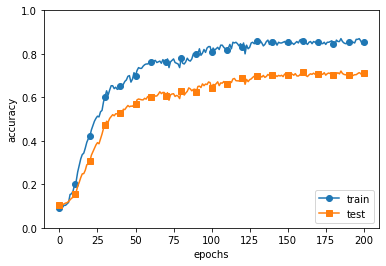

In [10]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 가중치 감소로 오버피팅 억제하기

In [8]:
# 데이터 로드하기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [9]:
# weight decay（가중치 감쇠） 설정
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우

In [10]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [11]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [12]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.10333333333333333, test acc:0.0976
epoch:1, train acc:0.11, test acc:0.1004
epoch:2, train acc:0.12666666666666668, test acc:0.1083
epoch:3, train acc:0.14333333333333334, test acc:0.1145
epoch:4, train acc:0.14333333333333334, test acc:0.1208
epoch:5, train acc:0.16333333333333333, test acc:0.1288
epoch:6, train acc:0.18666666666666668, test acc:0.1333
epoch:7, train acc:0.2, test acc:0.1484
epoch:8, train acc:0.22, test acc:0.1549
epoch:9, train acc:0.21666666666666667, test acc:0.1745
epoch:10, train acc:0.23333333333333334, test acc:0.1817


KeyboardInterrupt: 

In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 가중치 감쇠 0.1을 주지 않으면 train acc가 0.99 넘게 오버피팅이 발생
- 가중치 감쇠 0.2 적용 시, 학습이 제대로 되지 않는 모습 적절한 가중치 감쇠 필요

In [17]:
# weight decay（가중치 감쇠） 설정
weight_decay_lambda = 0.2 # weight decay를 사용하지 않을 경우

In [18]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [19]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [20]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.11666666666666667, test acc:0.1014
epoch:1, train acc:0.12333333333333334, test acc:0.1047
epoch:2, train acc:0.13666666666666666, test acc:0.1114
epoch:3, train acc:0.14666666666666667, test acc:0.1208
epoch:4, train acc:0.17666666666666667, test acc:0.1482
epoch:5, train acc:0.2, test acc:0.1734
epoch:6, train acc:0.23, test acc:0.1849
epoch:7, train acc:0.25, test acc:0.193
epoch:8, train acc:0.27, test acc:0.2128
epoch:9, train acc:0.31333333333333335, test acc:0.2432
epoch:10, train acc:0.3566666666666667, test acc:0.2786
epoch:11, train acc:0.36666666666666664, test acc:0.2865
epoch:12, train acc:0.42333333333333334, test acc:0.3194
epoch:13, train acc:0.4166666666666667, test acc:0.3182
epoch:14, train acc:0.42333333333333334, test acc:0.3364
epoch:15, train acc:0.46, test acc:0.3526
epoch:16, train acc:0.4766666666666667, test acc:0.3656
epoch:17, train acc:0.4866666666666667, test acc:0.3824
epoch:18, train acc:0.49333333333333335, test acc:0.3924
epoch:19

epoch:157, train acc:0.3933333333333333, test acc:0.3313
epoch:158, train acc:0.3933333333333333, test acc:0.3265
epoch:159, train acc:0.38666666666666666, test acc:0.3222
epoch:160, train acc:0.37666666666666665, test acc:0.3194
epoch:161, train acc:0.37666666666666665, test acc:0.3168
epoch:162, train acc:0.38, test acc:0.3179
epoch:163, train acc:0.37666666666666665, test acc:0.3168
epoch:164, train acc:0.37666666666666665, test acc:0.3149
epoch:165, train acc:0.36666666666666664, test acc:0.3121
epoch:166, train acc:0.36, test acc:0.3056
epoch:167, train acc:0.35333333333333333, test acc:0.2993
epoch:168, train acc:0.3433333333333333, test acc:0.2942
epoch:169, train acc:0.33666666666666667, test acc:0.2907
epoch:170, train acc:0.32666666666666666, test acc:0.2834
epoch:171, train acc:0.33, test acc:0.2809
epoch:172, train acc:0.32666666666666666, test acc:0.28
epoch:173, train acc:0.32666666666666666, test acc:0.2793
epoch:174, train acc:0.32666666666666666, test acc:0.2771
epoch:

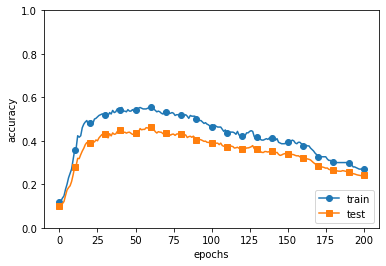

In [21]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃으로 오버피팅 억제하기

In [13]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [14]:
# 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 줄이기
x_train = x_train[:300]
t_train = t_train[:300]

In [15]:
# 드롭아웃 사용 유무와 비율 설정
use_dropout = True  # 드롭아웃 사용여부
dropout_ratio = 0.2

In [16]:
# 학습진행
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.306466211116495
=== epoch:1, train acc:0.08333333333333333, test acc:0.0935 ===
train loss:2.3233742007586047
train loss:2.316996688370058
train loss:2.3128754499657806
=== epoch:2, train acc:0.1, test acc:0.101 ===
train loss:2.305261699158031
train loss:2.323233781629496
train loss:2.322380959380987
=== epoch:3, train acc:0.10666666666666667, test acc:0.1037 ===
train loss:2.3299841311425937
train loss:2.2944871777306837
train loss:2.313756615900901
=== epoch:4, train acc:0.10333333333333333, test acc:0.1087 ===
train loss:2.3115197446062776
train loss:2.3146947128784494
train loss:2.2915479274684913
=== epoch:5, train acc:0.12, test acc:0.1127 ===
train loss:2.3060189595239247
train loss:2.3060533806881014
train loss:2.3087166566969675
=== epoch:6, train acc:0.11, test acc:0.1165 ===
train loss:2.300769070790303
train loss:2.307209865920115
train loss:2.290991967723541
=== epoch:7, train acc:0.11666666666666667, test acc:0.1241 ===
train loss:2.3042449149116804
train lo

=== epoch:56, train acc:0.29333333333333333, test acc:0.2372 ===
train loss:2.2043457542969236
train loss:2.190724808082194
train loss:2.12176917575993
=== epoch:57, train acc:0.29, test acc:0.235 ===
train loss:2.201563117509279
train loss:2.21408780497264
train loss:2.156440709260063
=== epoch:58, train acc:0.2966666666666667, test acc:0.236 ===
train loss:2.185494282222665
train loss:2.179938471891265
train loss:2.1669958492015713
=== epoch:59, train acc:0.30333333333333334, test acc:0.2393 ===
train loss:2.155080301619888
train loss:2.214972568723867
train loss:2.1924286573298772
=== epoch:60, train acc:0.30333333333333334, test acc:0.2384 ===
train loss:2.1954490380953584
train loss:2.1917199165158703
train loss:2.135285917841273
=== epoch:61, train acc:0.3, test acc:0.2344 ===
train loss:2.1374873671940895
train loss:2.1712117660836183
train loss:2.157337407301946
=== epoch:62, train acc:0.30333333333333334, test acc:0.2358 ===
train loss:2.197214408911791
train loss:2.1340088662

=== epoch:111, train acc:0.37333333333333335, test acc:0.303 ===
train loss:1.863452083852164
train loss:1.937497807885072
train loss:1.969950842592458
=== epoch:112, train acc:0.37, test acc:0.3027 ===
train loss:1.9049242890656959
train loss:2.017450237110186
train loss:1.835137259118409
=== epoch:113, train acc:0.37333333333333335, test acc:0.306 ===
train loss:1.9738056651486022
train loss:1.9669826390060792
train loss:1.9638809475322234
=== epoch:114, train acc:0.37333333333333335, test acc:0.3074 ===
train loss:1.947992724339209
train loss:1.9648766440084484
train loss:1.9905953751590344
=== epoch:115, train acc:0.38666666666666666, test acc:0.3137 ===
train loss:2.073229472587781
train loss:2.001055140157013
train loss:1.883459914052046
=== epoch:116, train acc:0.4, test acc:0.3175 ===
train loss:1.9715764168907208
train loss:1.9532246361397336
train loss:2.0137251617989946
=== epoch:117, train acc:0.4033333333333333, test acc:0.3217 ===
train loss:2.0072060775902303
train loss:

=== epoch:166, train acc:0.49666666666666665, test acc:0.4022 ===
train loss:1.601684135433723
train loss:1.7534902978161329
train loss:1.6689916438129972
=== epoch:167, train acc:0.49666666666666665, test acc:0.4021 ===
train loss:1.767247388982888
train loss:1.7652262820605011
train loss:1.7727762141998011
=== epoch:168, train acc:0.51, test acc:0.4072 ===
train loss:1.6497015887287703
train loss:1.8147428397102647
train loss:1.7310005145524383
=== epoch:169, train acc:0.51, test acc:0.4066 ===
train loss:1.7079196307432756
train loss:1.7113215901791798
train loss:1.7317891399700982
=== epoch:170, train acc:0.5133333333333333, test acc:0.4084 ===
train loss:1.790786745746264
train loss:1.8151818308201715
train loss:1.7186703009842716
=== epoch:171, train acc:0.5233333333333333, test acc:0.4118 ===
train loss:1.6778716516976533
train loss:1.768381609365936
train loss:1.6891317476807217
=== epoch:172, train acc:0.53, test acc:0.4156 ===
train loss:1.6391650514771285
train loss:1.675129

=== epoch:222, train acc:0.62, test acc:0.4851 ===
train loss:1.4183465324123992
train loss:1.4545543974882411
train loss:1.4115579966448637
=== epoch:223, train acc:0.6233333333333333, test acc:0.4878 ===
train loss:1.4117753910437292
train loss:1.3873947336072212
train loss:1.3675283135712375
=== epoch:224, train acc:0.6233333333333333, test acc:0.488 ===
train loss:1.5479985881799125
train loss:1.3541978959952385
train loss:1.4034139705617479
=== epoch:225, train acc:0.6233333333333333, test acc:0.4891 ===
train loss:1.440403018738745
train loss:1.4764444387355564
train loss:1.4887438322602093
=== epoch:226, train acc:0.62, test acc:0.4899 ===
train loss:1.4090230323535555
train loss:1.562307415010366
train loss:1.4496912061393403
=== epoch:227, train acc:0.6166666666666667, test acc:0.4912 ===
train loss:1.4117036891269574
train loss:1.4017382236684954
train loss:1.4830368223933297
=== epoch:228, train acc:0.62, test acc:0.4902 ===
train loss:1.3148115400546394
train loss:1.2912160

=== epoch:278, train acc:0.6666666666666666, test acc:0.5486 ===
train loss:1.0874193582387206
train loss:1.0418094114709664
train loss:1.0120216389474441
=== epoch:279, train acc:0.6733333333333333, test acc:0.5512 ===
train loss:1.0568060210001897
train loss:1.1224952015772531
train loss:1.1263569077099056
=== epoch:280, train acc:0.67, test acc:0.5542 ===
train loss:0.98461136874101
train loss:1.1920972859060037
train loss:1.1785947116287852
=== epoch:281, train acc:0.6733333333333333, test acc:0.5558 ===
train loss:1.084859618396277
train loss:0.9360729176722776
train loss:1.181873792830452
=== epoch:282, train acc:0.6733333333333333, test acc:0.5555 ===
train loss:0.9529161696389034
train loss:1.076630310748851
train loss:1.08050008463593
=== epoch:283, train acc:0.67, test acc:0.5559 ===
train loss:1.0963873432347955
train loss:1.2305915423633498
train loss:1.0654327781361803
=== epoch:284, train acc:0.6733333333333333, test acc:0.5549 ===
train loss:1.17976571224707
train loss:1

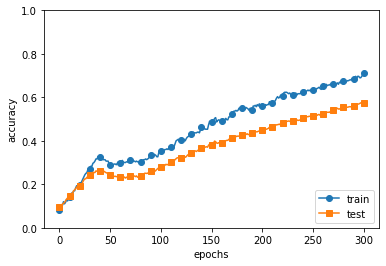

In [17]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃 비율 조정해보기

In [20]:
# 드롭아웃 사용 유무와 비율 설정
use_dropout = True  # 드롭아웃 사용여부
dropout_ratio = 0.1

# 학습진행
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.3314751181089512
=== epoch:1, train acc:0.08666666666666667, test acc:0.1034 ===
train loss:2.3393209350684536
train loss:2.316973392017008
train loss:2.320330647975749
=== epoch:2, train acc:0.09, test acc:0.1054 ===
train loss:2.3096688153665212
train loss:2.315644790181693
train loss:2.3051668297623507
=== epoch:3, train acc:0.07666666666666666, test acc:0.1104 ===
train loss:2.3121373355348935
train loss:2.3000943990132647
train loss:2.2679346128534514
=== epoch:4, train acc:0.08666666666666667, test acc:0.1112 ===
train loss:2.2790382893603276
train loss:2.2800470053793895
train loss:2.3197652621345344
=== epoch:5, train acc:0.09666666666666666, test acc:0.1157 ===
train loss:2.2760483068444675
train loss:2.3182318850256776
train loss:2.3084666431057097
=== epoch:6, train acc:0.10333333333333333, test acc:0.118 ===
train loss:2.2794577794697
train loss:2.294928824587181
train loss:2.2701767258192604
=== epoch:7, train acc:0.10333333333333333, test acc:0.1219 ===
train

=== epoch:57, train acc:0.5566666666666666, test acc:0.4157 ===
train loss:1.9721562038951685
train loss:1.9831237895919558
train loss:1.9249488649550446
=== epoch:58, train acc:0.5666666666666667, test acc:0.4169 ===
train loss:1.9987866740320683
train loss:1.929361675205635
train loss:2.000839817672491
=== epoch:59, train acc:0.5833333333333334, test acc:0.4346 ===
train loss:1.973932005282387
train loss:1.9374767791678238
train loss:1.8406987348124373
=== epoch:60, train acc:0.58, test acc:0.439 ===
train loss:2.000701086821687
train loss:1.8417411838556945
train loss:1.8541279760966933
=== epoch:61, train acc:0.5833333333333334, test acc:0.4464 ===
train loss:1.9125640679186355
train loss:1.950086794273136
train loss:1.9126243624838575
=== epoch:62, train acc:0.5933333333333334, test acc:0.4487 ===
train loss:1.9855500172449785
train loss:1.8776971627603078
train loss:2.0099015276676626
=== epoch:63, train acc:0.5966666666666667, test acc:0.4552 ===
train loss:1.8876429114634632
tr

=== epoch:112, train acc:0.7766666666666666, test acc:0.6251 ===
train loss:1.0890030922829073
train loss:1.0035228391521682
train loss:0.9110133998514475
=== epoch:113, train acc:0.7833333333333333, test acc:0.6251 ===
train loss:1.0500320898645155
train loss:0.9052904373140686
train loss:0.9918238062995709
=== epoch:114, train acc:0.7866666666666666, test acc:0.6286 ===
train loss:1.0058597085337555
train loss:0.9719382211748507
train loss:0.8695512975452963
=== epoch:115, train acc:0.7933333333333333, test acc:0.6323 ===
train loss:0.937137262392272
train loss:0.962628665529667
train loss:0.9420410394762888
=== epoch:116, train acc:0.7933333333333333, test acc:0.6335 ===
train loss:0.9139496799634164
train loss:0.9841397565505181
train loss:0.893294135343492
=== epoch:117, train acc:0.8, test acc:0.6352 ===
train loss:0.8902889073956183
train loss:0.8583793642647641
train loss:1.0255823885991873
=== epoch:118, train acc:0.7966666666666666, test acc:0.6363 ===
train loss:0.8937293306

=== epoch:167, train acc:0.8766666666666667, test acc:0.7051 ===
train loss:0.3562913190380809
train loss:0.44151522590917547
train loss:0.524248096218429
=== epoch:168, train acc:0.8766666666666667, test acc:0.7032 ===
train loss:0.4566745931973897
train loss:0.5046605454591169
train loss:0.327084520129558
=== epoch:169, train acc:0.8833333333333333, test acc:0.7055 ===
train loss:0.4514508852399375
train loss:0.42001646791621206
train loss:0.3251089408047702
=== epoch:170, train acc:0.88, test acc:0.7028 ===
train loss:0.4210808354792249
train loss:0.30821991259147974
train loss:0.37709539835732925
=== epoch:171, train acc:0.8833333333333333, test acc:0.707 ===
train loss:0.32386604128962626
train loss:0.4318487394349312
train loss:0.3518430207159878
=== epoch:172, train acc:0.8933333333333333, test acc:0.707 ===
train loss:0.448123243288776
train loss:0.4003471315834391
train loss:0.45217807954375333
=== epoch:173, train acc:0.89, test acc:0.7118 ===
train loss:0.43224531604201916
t

=== epoch:221, train acc:0.95, test acc:0.7436 ===
train loss:0.2271276964277159
train loss:0.18655909850646868
train loss:0.23835464321562724
=== epoch:222, train acc:0.9533333333333334, test acc:0.7459 ===
train loss:0.17816765786780828
train loss:0.1947044701511259
train loss:0.19624099282561439
=== epoch:223, train acc:0.96, test acc:0.7466 ===
train loss:0.21858868642913012
train loss:0.15983837995678646
train loss:0.17408571338961681
=== epoch:224, train acc:0.96, test acc:0.7467 ===
train loss:0.13903908868145978
train loss:0.24917512807371453
train loss:0.14552743883821867
=== epoch:225, train acc:0.96, test acc:0.7426 ===
train loss:0.20348761741265448
train loss:0.24980619701078915
train loss:0.15982454720589184
=== epoch:226, train acc:0.95, test acc:0.7421 ===
train loss:0.2426850875297005
train loss:0.20134773976706338
train loss:0.21605980760554658
=== epoch:227, train acc:0.95, test acc:0.7449 ===
train loss:0.14406161120697403
train loss:0.2260123021769342
train loss:0.

=== epoch:275, train acc:0.9766666666666667, test acc:0.7672 ===
train loss:0.06369305613702442
train loss:0.05001647875081544
train loss:0.11458420227072402
=== epoch:276, train acc:0.9766666666666667, test acc:0.7669 ===
train loss:0.07236331187954331
train loss:0.13737500289632398
train loss:0.11724276418711643
=== epoch:277, train acc:0.9833333333333333, test acc:0.769 ===
train loss:0.09473087589056853
train loss:0.09456787329578048
train loss:0.09085356604693154
=== epoch:278, train acc:0.98, test acc:0.7664 ===
train loss:0.08779360451016645
train loss:0.058643266613138255
train loss:0.13507327073429543
=== epoch:279, train acc:0.9833333333333333, test acc:0.7676 ===
train loss:0.10608131389104056
train loss:0.11740214211224907
train loss:0.07551924787853667
=== epoch:280, train acc:0.9833333333333333, test acc:0.7666 ===
train loss:0.06539642731794604
train loss:0.07028589425900271
train loss:0.06739836360786086
=== epoch:281, train acc:0.9833333333333333, test acc:0.7691 ===
t

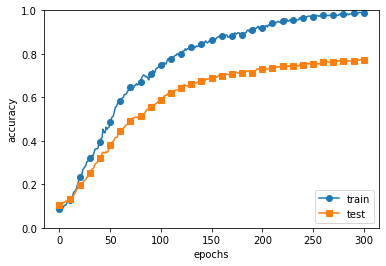

In [21]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [22]:
# 드롭아웃 사용 유무와 비율 설정
use_dropout = True  # 드롭아웃 사용여부
dropout_ratio = 0.3

# 학습진행
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.2959210647840487
=== epoch:1, train acc:0.06, test acc:0.0634 ===
train loss:2.310403273288428
train loss:2.309717111159578
train loss:2.301306025939381
=== epoch:2, train acc:0.06333333333333334, test acc:0.0656 ===
train loss:2.3171689045428097
train loss:2.3135769199630234
train loss:2.2903067130252794
=== epoch:3, train acc:0.06333333333333334, test acc:0.0672 ===
train loss:2.301512804903795
train loss:2.2937438779694914
train loss:2.301702891448014
=== epoch:4, train acc:0.06333333333333334, test acc:0.0664 ===
train loss:2.303317523288316
train loss:2.3028910463682273
train loss:2.303676819906938
=== epoch:5, train acc:0.06333333333333334, test acc:0.0681 ===
train loss:2.302550624868801
train loss:2.295723532825746
train loss:2.2982014673736275
=== epoch:6, train acc:0.06666666666666667, test acc:0.0702 ===
train loss:2.313798894624564
train loss:2.294495453289609
train loss:2.3117153786873157
=== epoch:7, train acc:0.06666666666666667, test acc:0.0705 ===
train lo

=== epoch:57, train acc:0.16666666666666666, test acc:0.1487 ===
train loss:2.275802165070892
train loss:2.2908857977089156
train loss:2.282374887941925
=== epoch:58, train acc:0.16666666666666666, test acc:0.1504 ===
train loss:2.28095827052158
train loss:2.2838101412891327
train loss:2.2872185115216284
=== epoch:59, train acc:0.17, test acc:0.1509 ===
train loss:2.2835653945951195
train loss:2.2882847893987885
train loss:2.2880837724992116
=== epoch:60, train acc:0.17, test acc:0.153 ===
train loss:2.290100123577364
train loss:2.298242782627925
train loss:2.282750116603335
=== epoch:61, train acc:0.17666666666666667, test acc:0.154 ===
train loss:2.273254988776885
train loss:2.289447676031024
train loss:2.272374007568524
=== epoch:62, train acc:0.18333333333333332, test acc:0.155 ===
train loss:2.2777473972999065
train loss:2.2811134262066592
train loss:2.2894144816969946
=== epoch:63, train acc:0.18333333333333332, test acc:0.1569 ===
train loss:2.27637160495262
train loss:2.2786658

=== epoch:112, train acc:0.26, test acc:0.2085 ===
train loss:2.2664576342005547
train loss:2.2732535096466795
train loss:2.2805065228008146
=== epoch:113, train acc:0.26, test acc:0.2072 ===
train loss:2.270181451612015
train loss:2.2797767795929746
train loss:2.283542753412449
=== epoch:114, train acc:0.26, test acc:0.2042 ===
train loss:2.2579051333159064
train loss:2.269565854533451
train loss:2.2720326974688665
=== epoch:115, train acc:0.27, test acc:0.2085 ===
train loss:2.2741719094540156
train loss:2.260937989114373
train loss:2.2611318285312483
=== epoch:116, train acc:0.27, test acc:0.2065 ===
train loss:2.2634293011664868
train loss:2.2683154190393706
train loss:2.2811963287383064
=== epoch:117, train acc:0.27, test acc:0.2079 ===
train loss:2.2694424909744826
train loss:2.270139572556597
train loss:2.2733723956824
=== epoch:118, train acc:0.27666666666666667, test acc:0.2103 ===
train loss:2.2538283318262495
train loss:2.282233938934948
train loss:2.2674222565447724
=== epo

=== epoch:167, train acc:0.2966666666666667, test acc:0.2365 ===
train loss:2.247177852916477
train loss:2.250514509452909
train loss:2.2662390343007046
=== epoch:168, train acc:0.3, test acc:0.2375 ===
train loss:2.2408003838936725
train loss:2.2679051884480512
train loss:2.25304461304386
=== epoch:169, train acc:0.3, test acc:0.2381 ===
train loss:2.250572605879545
train loss:2.252017296224897
train loss:2.2675784711634517
=== epoch:170, train acc:0.3, test acc:0.2368 ===
train loss:2.2517256296095343
train loss:2.2583545552683124
train loss:2.258025790661401
=== epoch:171, train acc:0.3, test acc:0.2375 ===
train loss:2.265808194790244
train loss:2.235275606123382
train loss:2.2436325115730553
=== epoch:172, train acc:0.30333333333333334, test acc:0.2377 ===
train loss:2.255630509275437
train loss:2.245394822558703
train loss:2.2393267758743467
=== epoch:173, train acc:0.30333333333333334, test acc:0.2382 ===
train loss:2.2454180182193286
train loss:2.2683261322933923
train loss:2.2

=== epoch:222, train acc:0.33666666666666667, test acc:0.2709 ===
train loss:2.2483869404802506
train loss:2.228156527174842
train loss:2.2431748745822304
=== epoch:223, train acc:0.3333333333333333, test acc:0.2746 ===
train loss:2.22933320883052
train loss:2.201584754788151
train loss:2.214209383602645
=== epoch:224, train acc:0.34, test acc:0.2758 ===
train loss:2.2396622384363076
train loss:2.2562664632895957
train loss:2.2280057594487364
=== epoch:225, train acc:0.3433333333333333, test acc:0.2789 ===
train loss:2.2106885384539496
train loss:2.194895450502548
train loss:2.2106966443737592
=== epoch:226, train acc:0.3433333333333333, test acc:0.2781 ===
train loss:2.1929700356995405
train loss:2.2202934599203443
train loss:2.2135324396230094
=== epoch:227, train acc:0.34, test acc:0.2745 ===
train loss:2.197237844727532
train loss:2.211765962009437
train loss:2.2001654417484797
=== epoch:228, train acc:0.34, test acc:0.2749 ===
train loss:2.215716762201063
train loss:2.216259549712

=== epoch:278, train acc:0.32666666666666666, test acc:0.2726 ===
train loss:2.159356188944273
train loss:2.1316138162506095
train loss:2.157319241245557
=== epoch:279, train acc:0.32666666666666666, test acc:0.275 ===
train loss:2.140784522611724
train loss:2.1767079996710166
train loss:2.20522659550812
=== epoch:280, train acc:0.33, test acc:0.2757 ===
train loss:2.160542601586604
train loss:2.169129854755295
train loss:2.18876984941552
=== epoch:281, train acc:0.33, test acc:0.2757 ===
train loss:2.1238397117560166
train loss:2.1649290860298267
train loss:2.223674451905357
=== epoch:282, train acc:0.33666666666666667, test acc:0.277 ===
train loss:2.1238143749490233
train loss:2.1737856148207326
train loss:2.083409322252959
=== epoch:283, train acc:0.32666666666666666, test acc:0.2739 ===
train loss:2.1836673670503775
train loss:2.1259285755679014
train loss:2.1590470822384393
=== epoch:284, train acc:0.32666666666666666, test acc:0.2742 ===
train loss:2.2101985438219445
train loss:

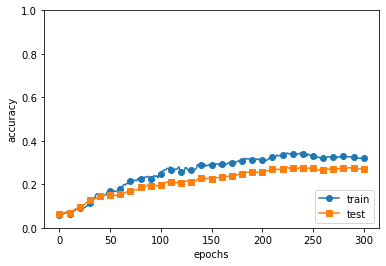

In [23]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 드롭아웃 0.1은 오버피팅의 여지가 있고
- 드롭아웃 0.3은 학습이 저조한 경향이 있어 드롭아웃 0.2가 최적